## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9578754	total: 58.3ms	remaining: 58.3s
1:	learn: 0.9389149	total: 59.4ms	remaining: 29.6s
2:	learn: 0.9201987	total: 60.5ms	remaining: 20.1s
3:	learn: 0.9045484	total: 61.7ms	remaining: 15.4s
4:	learn: 0.8900267	total: 62.6ms	remaining: 12.5s
5:	learn: 0.8738702	total: 63.6ms	remaining: 10.5s
6:	learn: 0.8592268	total: 64.5ms	remaining: 9.15s
7:	learn: 0.8439924	total: 65.4ms	remaining: 8.11s
8:	learn: 0.8297672	total: 66.3ms	remaining: 7.29s
9:	learn: 0.8143096	total: 67.1ms	remaining: 6.64s
10:	learn: 0.7993338	total: 67.9ms	remaining: 6.11s
11:	learn: 0.7864512	total: 68.9ms	remaining: 5.67s
12:	learn: 0.7718280	total: 69.6ms	remaining: 5.28s
13:	learn: 0.7577103	total: 70.4ms	remaining: 4.96s
14:	learn: 0.7462665	total: 71.2ms	remaining: 4.68s
15:	learn: 0.7326830	total: 72.4ms	remaining: 4.45s
16:	learn: 0.7215824	total: 73.7ms	remaining: 4.26s
17:	learn: 0.7110233	total: 75.1ms	remaining: 4.09s
18:	learn: 0.6993305	total: 76ms	remaining: 

47:	learn: 0.4725899	total: 102ms	remaining: 2.02s
48:	learn: 0.4682713	total: 103ms	remaining: 2s
49:	learn: 0.4631993	total: 104ms	remaining: 1.98s
50:	learn: 0.4594593	total: 105ms	remaining: 1.96s
51:	learn: 0.4539629	total: 106ms	remaining: 1.94s
52:	learn: 0.4489734	total: 107ms	remaining: 1.91s
53:	learn: 0.4442559	total: 108ms	remaining: 1.89s
54:	learn: 0.4397448	total: 109ms	remaining: 1.87s
55:	learn: 0.4363155	total: 110ms	remaining: 1.85s
56:	learn: 0.4331923	total: 110ms	remaining: 1.82s
57:	learn: 0.4290276	total: 111ms	remaining: 1.8s
58:	learn: 0.4247362	total: 112ms	remaining: 1.78s
59:	learn: 0.4216672	total: 113ms	remaining: 1.76s
60:	learn: 0.4178923	total: 113ms	remaining: 1.75s
61:	learn: 0.4145842	total: 114ms	remaining: 1.73s
62:	learn: 0.4119180	total: 115ms	remaining: 1.71s
63:	learn: 0.4082216	total: 116ms	remaining: 1.69s
64:	learn: 0.4053022	total: 117ms	remaining: 1.68s
65:	learn: 0.4018322	total: 118ms	remaining: 1.66s
66:	learn: 0.3988199	total: 119ms	r

146:	learn: 0.2618416	total: 191ms	remaining: 1.11s
147:	learn: 0.2613705	total: 192ms	remaining: 1.1s
148:	learn: 0.2605130	total: 193ms	remaining: 1.1s
149:	learn: 0.2603470	total: 193ms	remaining: 1.09s
150:	learn: 0.2595275	total: 194ms	remaining: 1.09s
151:	learn: 0.2586306	total: 195ms	remaining: 1.09s
152:	learn: 0.2577945	total: 196ms	remaining: 1.08s
153:	learn: 0.2572625	total: 197ms	remaining: 1.08s
154:	learn: 0.2564345	total: 199ms	remaining: 1.08s
155:	learn: 0.2561287	total: 200ms	remaining: 1.08s
156:	learn: 0.2548805	total: 201ms	remaining: 1.08s
157:	learn: 0.2541763	total: 202ms	remaining: 1.07s
158:	learn: 0.2533474	total: 202ms	remaining: 1.07s
159:	learn: 0.2523838	total: 203ms	remaining: 1.07s
160:	learn: 0.2516526	total: 204ms	remaining: 1.06s
161:	learn: 0.2511693	total: 205ms	remaining: 1.06s
162:	learn: 0.2504618	total: 206ms	remaining: 1.06s
163:	learn: 0.2494116	total: 207ms	remaining: 1.05s
164:	learn: 0.2488913	total: 208ms	remaining: 1.05s
165:	learn: 0.

257:	learn: 0.1997762	total: 290ms	remaining: 835ms
258:	learn: 0.1996464	total: 292ms	remaining: 834ms
259:	learn: 0.1992432	total: 293ms	remaining: 833ms
260:	learn: 0.1985887	total: 294ms	remaining: 832ms
261:	learn: 0.1980803	total: 295ms	remaining: 831ms
262:	learn: 0.1977444	total: 296ms	remaining: 829ms
263:	learn: 0.1975685	total: 297ms	remaining: 827ms
264:	learn: 0.1969070	total: 297ms	remaining: 825ms
265:	learn: 0.1965204	total: 298ms	remaining: 823ms
266:	learn: 0.1960177	total: 299ms	remaining: 822ms
267:	learn: 0.1956389	total: 300ms	remaining: 820ms
268:	learn: 0.1952311	total: 301ms	remaining: 818ms
269:	learn: 0.1947922	total: 302ms	remaining: 816ms
270:	learn: 0.1946739	total: 303ms	remaining: 814ms
271:	learn: 0.1940129	total: 304ms	remaining: 812ms
272:	learn: 0.1939365	total: 304ms	remaining: 810ms
273:	learn: 0.1937019	total: 305ms	remaining: 809ms
274:	learn: 0.1932814	total: 306ms	remaining: 807ms
275:	learn: 0.1926078	total: 307ms	remaining: 806ms
276:	learn: 

357:	learn: 0.1605949	total: 379ms	remaining: 680ms
358:	learn: 0.1601502	total: 380ms	remaining: 679ms
359:	learn: 0.1596800	total: 381ms	remaining: 677ms
360:	learn: 0.1593389	total: 382ms	remaining: 676ms
361:	learn: 0.1590473	total: 383ms	remaining: 674ms
362:	learn: 0.1588102	total: 383ms	remaining: 673ms
363:	learn: 0.1585358	total: 385ms	remaining: 672ms
364:	learn: 0.1582975	total: 386ms	remaining: 671ms
365:	learn: 0.1581063	total: 387ms	remaining: 671ms
366:	learn: 0.1577182	total: 388ms	remaining: 670ms
367:	learn: 0.1575047	total: 389ms	remaining: 669ms
368:	learn: 0.1572699	total: 390ms	remaining: 667ms
369:	learn: 0.1568511	total: 391ms	remaining: 666ms
370:	learn: 0.1565287	total: 392ms	remaining: 664ms
371:	learn: 0.1561578	total: 393ms	remaining: 663ms
372:	learn: 0.1560381	total: 393ms	remaining: 661ms
373:	learn: 0.1557001	total: 394ms	remaining: 660ms
374:	learn: 0.1554733	total: 395ms	remaining: 659ms
375:	learn: 0.1550320	total: 396ms	remaining: 657ms
376:	learn: 

462:	learn: 0.1307600	total: 479ms	remaining: 556ms
463:	learn: 0.1305465	total: 480ms	remaining: 555ms
464:	learn: 0.1305080	total: 482ms	remaining: 554ms
465:	learn: 0.1302924	total: 482ms	remaining: 553ms
466:	learn: 0.1299004	total: 483ms	remaining: 552ms
467:	learn: 0.1295172	total: 484ms	remaining: 550ms
468:	learn: 0.1294819	total: 485ms	remaining: 549ms
469:	learn: 0.1291125	total: 486ms	remaining: 548ms
470:	learn: 0.1288402	total: 487ms	remaining: 547ms
471:	learn: 0.1285936	total: 488ms	remaining: 546ms
472:	learn: 0.1285640	total: 489ms	remaining: 544ms
473:	learn: 0.1282519	total: 489ms	remaining: 543ms
474:	learn: 0.1279171	total: 490ms	remaining: 542ms
475:	learn: 0.1276474	total: 491ms	remaining: 541ms
476:	learn: 0.1274637	total: 492ms	remaining: 539ms
477:	learn: 0.1272317	total: 493ms	remaining: 538ms
478:	learn: 0.1271066	total: 494ms	remaining: 537ms
479:	learn: 0.1267275	total: 495ms	remaining: 536ms
480:	learn: 0.1265222	total: 496ms	remaining: 535ms
481:	learn: 

559:	learn: 0.1110135	total: 568ms	remaining: 446ms
560:	learn: 0.1109377	total: 569ms	remaining: 445ms
561:	learn: 0.1107934	total: 569ms	remaining: 444ms
562:	learn: 0.1105406	total: 570ms	remaining: 443ms
563:	learn: 0.1103065	total: 571ms	remaining: 441ms
564:	learn: 0.1100369	total: 572ms	remaining: 441ms
565:	learn: 0.1098372	total: 573ms	remaining: 440ms
566:	learn: 0.1096268	total: 574ms	remaining: 439ms
567:	learn: 0.1094602	total: 576ms	remaining: 438ms
568:	learn: 0.1093305	total: 577ms	remaining: 437ms
569:	learn: 0.1092020	total: 578ms	remaining: 436ms
570:	learn: 0.1091702	total: 578ms	remaining: 434ms
571:	learn: 0.1089294	total: 579ms	remaining: 433ms
572:	learn: 0.1086384	total: 580ms	remaining: 432ms
573:	learn: 0.1085931	total: 581ms	remaining: 431ms
574:	learn: 0.1083781	total: 582ms	remaining: 430ms
575:	learn: 0.1081711	total: 583ms	remaining: 429ms
576:	learn: 0.1079322	total: 584ms	remaining: 428ms
577:	learn: 0.1076439	total: 584ms	remaining: 427ms
578:	learn: 

672:	learn: 0.0926666	total: 669ms	remaining: 325ms
673:	learn: 0.0924769	total: 670ms	remaining: 324ms
674:	learn: 0.0922307	total: 671ms	remaining: 323ms
675:	learn: 0.0921239	total: 672ms	remaining: 322ms
676:	learn: 0.0918978	total: 673ms	remaining: 321ms
677:	learn: 0.0918719	total: 673ms	remaining: 320ms
678:	learn: 0.0917012	total: 674ms	remaining: 319ms
679:	learn: 0.0916271	total: 675ms	remaining: 318ms
680:	learn: 0.0914702	total: 676ms	remaining: 317ms
681:	learn: 0.0913204	total: 677ms	remaining: 316ms
682:	learn: 0.0911519	total: 678ms	remaining: 315ms
683:	learn: 0.0909599	total: 679ms	remaining: 314ms
684:	learn: 0.0907987	total: 680ms	remaining: 312ms
685:	learn: 0.0906842	total: 680ms	remaining: 311ms
686:	learn: 0.0906610	total: 681ms	remaining: 310ms
687:	learn: 0.0906042	total: 682ms	remaining: 309ms
688:	learn: 0.0904584	total: 683ms	remaining: 308ms
689:	learn: 0.0903373	total: 684ms	remaining: 307ms
690:	learn: 0.0903115	total: 685ms	remaining: 306ms
691:	learn: 

770:	learn: 0.0804276	total: 757ms	remaining: 225ms
771:	learn: 0.0803344	total: 758ms	remaining: 224ms
772:	learn: 0.0801445	total: 758ms	remaining: 223ms
773:	learn: 0.0800760	total: 759ms	remaining: 222ms
774:	learn: 0.0799477	total: 760ms	remaining: 221ms
775:	learn: 0.0798599	total: 762ms	remaining: 220ms
776:	learn: 0.0797567	total: 763ms	remaining: 219ms
777:	learn: 0.0797161	total: 764ms	remaining: 218ms
778:	learn: 0.0797045	total: 765ms	remaining: 217ms
779:	learn: 0.0796904	total: 765ms	remaining: 216ms
780:	learn: 0.0794828	total: 766ms	remaining: 215ms
781:	learn: 0.0792944	total: 767ms	remaining: 214ms
782:	learn: 0.0792075	total: 768ms	remaining: 213ms
783:	learn: 0.0790516	total: 769ms	remaining: 212ms
784:	learn: 0.0789082	total: 770ms	remaining: 211ms
785:	learn: 0.0786963	total: 770ms	remaining: 210ms
786:	learn: 0.0785596	total: 771ms	remaining: 209ms
787:	learn: 0.0785332	total: 772ms	remaining: 208ms
788:	learn: 0.0784115	total: 773ms	remaining: 207ms
789:	learn: 

881:	learn: 0.0691486	total: 858ms	remaining: 115ms
882:	learn: 0.0690635	total: 859ms	remaining: 114ms
883:	learn: 0.0690318	total: 860ms	remaining: 113ms
884:	learn: 0.0689960	total: 860ms	remaining: 112ms
885:	learn: 0.0688488	total: 861ms	remaining: 111ms
886:	learn: 0.0686650	total: 862ms	remaining: 110ms
887:	learn: 0.0685130	total: 863ms	remaining: 109ms
888:	learn: 0.0683511	total: 864ms	remaining: 108ms
889:	learn: 0.0681930	total: 865ms	remaining: 107ms
890:	learn: 0.0681658	total: 866ms	remaining: 106ms
891:	learn: 0.0680612	total: 867ms	remaining: 105ms
892:	learn: 0.0679170	total: 867ms	remaining: 104ms
893:	learn: 0.0678364	total: 868ms	remaining: 103ms
894:	learn: 0.0677885	total: 869ms	remaining: 102ms
895:	learn: 0.0677405	total: 870ms	remaining: 101ms
896:	learn: 0.0676218	total: 871ms	remaining: 100ms
897:	learn: 0.0675300	total: 872ms	remaining: 99ms
898:	learn: 0.0674047	total: 873ms	remaining: 98.1ms
899:	learn: 0.0673415	total: 874ms	remaining: 97.1ms
900:	learn:

980:	learn: 0.0605192	total: 946ms	remaining: 18.3ms
981:	learn: 0.0604859	total: 947ms	remaining: 17.4ms
982:	learn: 0.0604042	total: 947ms	remaining: 16.4ms
983:	learn: 0.0603739	total: 949ms	remaining: 15.4ms
984:	learn: 0.0602984	total: 950ms	remaining: 14.5ms
985:	learn: 0.0602588	total: 951ms	remaining: 13.5ms
986:	learn: 0.0601888	total: 952ms	remaining: 12.5ms
987:	learn: 0.0601187	total: 953ms	remaining: 11.6ms
988:	learn: 0.0600536	total: 954ms	remaining: 10.6ms
989:	learn: 0.0599768	total: 955ms	remaining: 9.64ms
990:	learn: 0.0599049	total: 956ms	remaining: 8.68ms
991:	learn: 0.0597724	total: 957ms	remaining: 7.71ms
992:	learn: 0.0597476	total: 957ms	remaining: 6.75ms
993:	learn: 0.0595982	total: 958ms	remaining: 5.78ms
994:	learn: 0.0594876	total: 959ms	remaining: 4.82ms
995:	learn: 0.0594332	total: 960ms	remaining: 3.85ms
996:	learn: 0.0593367	total: 961ms	remaining: 2.89ms
997:	learn: 0.0592527	total: 962ms	remaining: 1.93ms
998:	learn: 0.0591353	total: 962ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

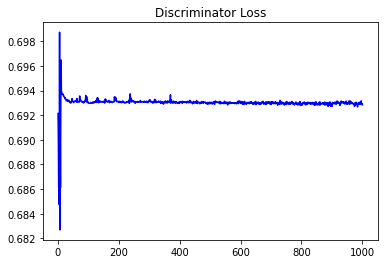

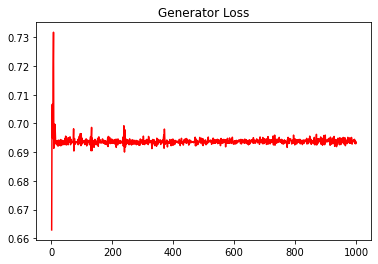

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1130842739949274


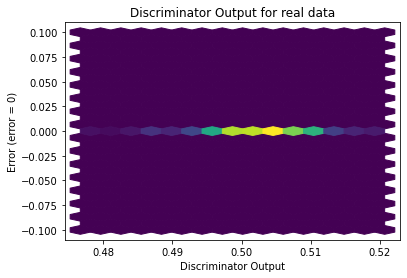

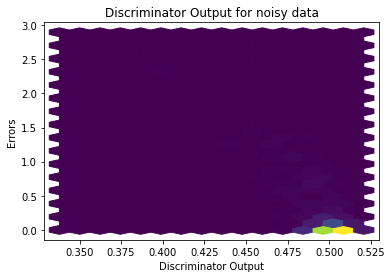

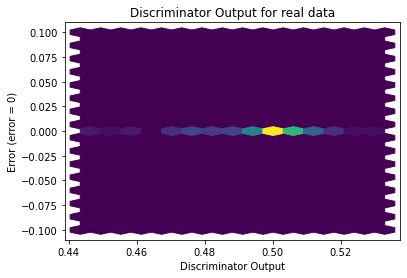

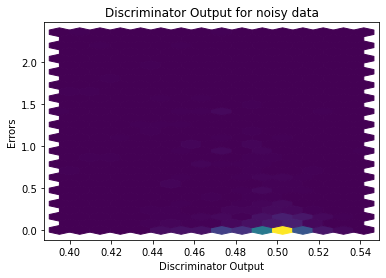

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


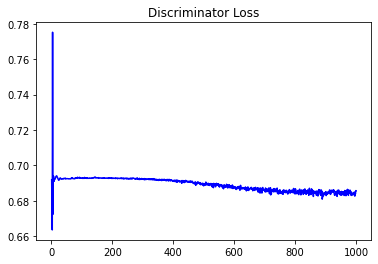

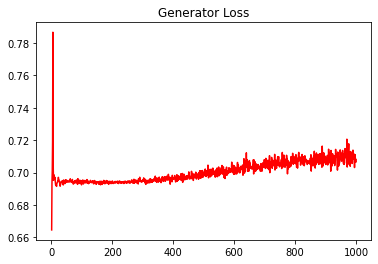

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12570817101824727


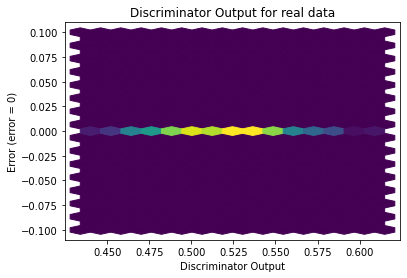

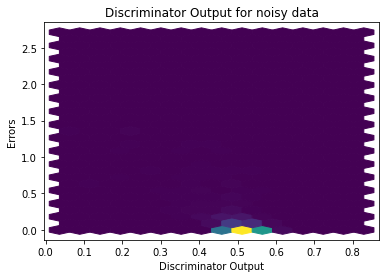

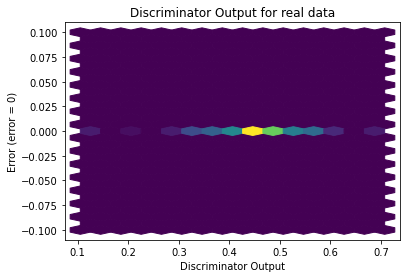

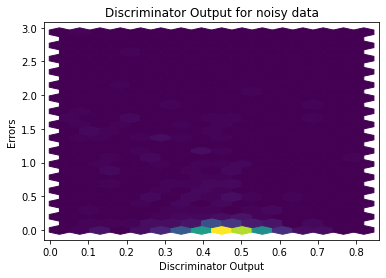

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1397]], requires_grad=True)
